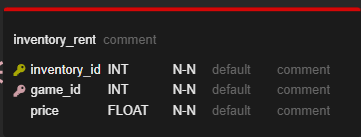

In [80]:
import pandas as pd
import random
import numpy as np
import openpyxl
import scipy

In [68]:
from scipy.special import softmax

In [9]:
num_games_id = 50

In [ ]:
#tu można pozmieniać te wartości
num_players_games = {'1' : random.int(20, 30),
                     '2' : random.int(15, 25),
                     '3' : random.int(12, 20),
                     '4' : random.int(10, 15),
                     '5' : random.int(10, 15),
                     'other' : random.int(5, 10)
}

In [18]:
games = pd.read_excel('games.xlsx')

In [19]:
games.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79244,1,3.8604,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61278,2,2.8405,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66337,3,3.9129,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43254,4,3.2406,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.69649,5,4.2219,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [41]:
n_items = 500
#max_players_for_game = 15
m_players = [1, 2, 3, 4, 5]
probs = [0.2, 0.4, 0.2, 0.1, 0.1]
np.random.seed(42)

n_players = np.random.choice([1, 2, 3, 4, 5], (n_items,), p=probs) #losujemy ile bd 1, ile 2, ile 3 itd...
# n_players_with_5 = (n_players == 5).sum()
# players_above_5 = np.random.randint(5, max_players_for_game + 1, (n_players_with_5,))
# n_players[n_players == 5] = players_above_5

In [82]:
gen_id = np.arange(50)
n_players_sim = np.random.randint(1, max_players_for_game, (50, )) #to ma byc max players z danej gry
ratings = np.random.randint(0, 10, (50,)) #to ma byc rating danej gry
used_data = pd.DataFrame({'id' : games['ID'], 'max_players' : games['Max Players'], 'rating' : games['Rating Average']})
sim_data = pd.DataFrame({'id': genre_id, 'n_players_sim': n_players_sim, 'rating':ratings})

In [83]:
def exchange_players_to_game_id(df, n_players):
    sim_id = []
    for i in range(1, 6):
        n = (n_players == i).sum()
        if i == 5:
            simulated_id = list(np.random.choice(df.loc[df['n_players_sim'] >= i, 'id'].values, (n,)))
        else:
            simulated_id = list(np.random.choice(df.loc[df['n_players_sim'] == i, 'id'].values, (n,)))
        sim_id += simulated_id
    return sim_id

In [ ]:
def exchange_players_to_game_id2(df, n_players):
    game_id = []
    for i in range(1, 6):
        n = (n_players == i).sum()
        if i == 5:
            prob_r = softmax(df.loc[df['Max Players'] >= i, 'Rating Average'].values)
            simulated_id = list(np.random.choice(df.loc[df['Max Players'] >= i, 'ID'].values, (n,), p = prob_r))
        else:
            prob_r = softmax(df.loc[df['Max Players'] >= i, 'Rating Average'].values)
            simulated_id = list(np.random.choice(df.loc[df['Max Players'] == i, 'ID'].values, (n,), p = prob_r))
        game_id += simulated_id
    return game_id

In [75]:
games.loc[games['Max Players'] == 5, 'ID'].values

array([167791., 169786., 120677., ...,   4077.,   5130.,  11017.])

In [85]:
exchange_players_to_game_id(sim_data, n_players)

[33,
 37,
 44,
 44,
 2,
 2,
 33,
 44,
 2,
 37,
 37,
 2,
 2,
 44,
 44,
 33,
 44,
 37,
 37,
 2,
 44,
 33,
 37,
 37,
 33,
 33,
 37,
 37,
 17,
 36,
 10,
 10,
 17,
 17,
 17,
 10,
 36,
 10,
 36,
 10,
 36,
 10,
 17,
 10,
 36,
 10,
 10,
 10,
 17,
 10,
 17,
 17,
 10,
 10,
 10,
 36,
 10,
 17,
 10,
 36,
 10,
 36,
 36,
 34,
 0,
 11,
 0,
 0,
 0,
 49,
 32,
 0,
 32,
 34,
 11,
 34,
 34,
 49,
 11,
 34,
 34,
 11,
 35,
 22,
 35,
 22,
 35,
 35,
 14,
 14,
 35,
 40,
 23,
 12,
 47,
 26,
 18,
 41,
 42,
 18]

In [ ]:
prob_r = softmax(df.loc[df['Max Players'] >= i, 'Rating Average'].values)

In [49]:
len(exchange_players_to_game_id(sim_data, n_players)) #game_id

100

In [42]:
n_players

array([2, 5, 3, 2, 1, 1, 1, 4, 3, 3, 1, 5, 4, 2, 1, 1, 2, 2, 2, 2, 3, 1,
       2, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 5, 5, 4, 2, 1, 3, 2, 1, 2, 1, 5,
       2, 3, 2, 2, 2, 1, 5, 3, 5, 4, 2, 5, 1, 1, 1, 2, 2, 2, 4, 2, 2, 2,
       1, 4, 1, 5, 3, 1, 1, 4, 3, 3, 3, 1, 2, 1, 4, 3, 2, 1, 2, 2, 3, 3,
       4, 2, 1, 3, 3, 2, 3, 2, 2, 2, 1, 1])

In [ ]:
data = {'game_id' : exchange_players_to_game_id(sim_data, n_players))
        'price' : ,
        }